# LVIT Analysis

In [1]:
import serial
import time
from datetime import datetime
import pdb
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

## Set Up

In [2]:
color_list = ['b','g','r','c','m','y']
brands = ['A','P','C','K','E','D']
brandnames = ['Arctic Gel', 'Pampers','Coterie','Kudos','Earth&Eden','Dyper']

In [3]:
def closest_value(input_list, input_value):
 
  arr = np.asarray(input_list)
 
  i = (np.abs(arr - input_value)).argmin()
 
  return arr[i]

## Main Analysis Loop

#### Makes a plot for each run and then overlays them all together.

Make the filename consistent with the file produced in LVIT Test in the format filename = (brand)_(experiment)_run.csv. Change those variables to be consistent with the data set.

P2_1.csv
T-20 = 105.585 when Mass = 19.939464172859154
P2_2.csv
T-20 = 140.084 when Mass = 19.939262213331414
P2_3.csv
T-20 = 122.806 when Mass = 20.136576671924402

Average T-20 = 123 s
Average Max Absorption Rate = 0.215 cc/s


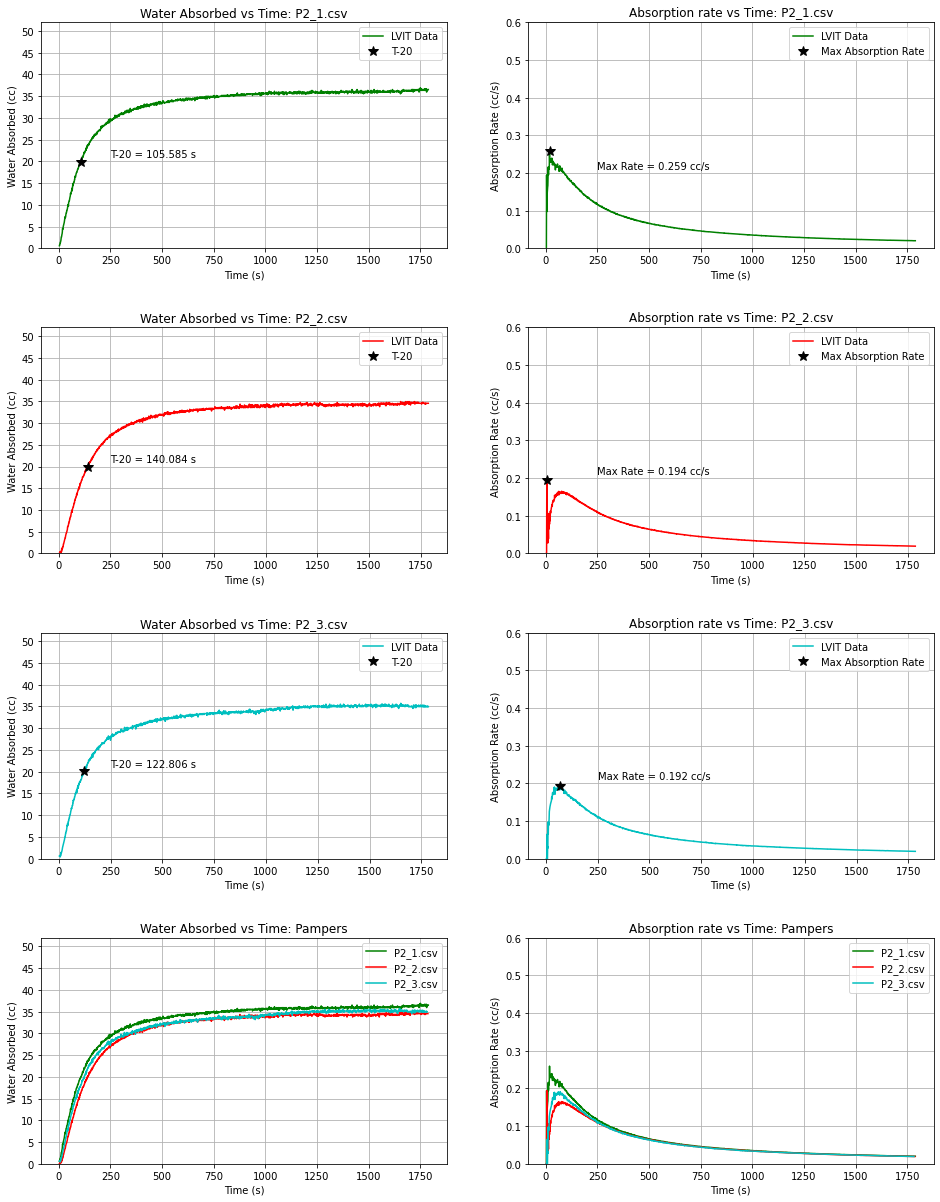

In [4]:
#Set Up Brand Specifics
brand = "p"
brandname = brandnames[brands.index(brand.upper())]

experiment = 2
#Set Up File Format
brand =  f"{brand.upper()}{experiment}"

#Set Up Figures: Rows = # of trials + a compilation, Columns = Mass data + Rate Data
fig, axs = plt.subplots(nrows=(int(runs)+1), ncols=2, figsize=(16, int(runs)*7))
axs = axs.flatten()
fig.subplots_adjust(hspace=.35)
yp2 = np.linspace(0,(50),11)
yv2 = np.linspace(0,(.25),6)

#Set up variables for mean analysis
displacements = []
max_rates = []
max_times = []
absorptions = []
M20s = []
T20s = []   

#Main Loop    
for run in range(1,int(runs) +1):
    #Set up variables for each trial.
    Time = []
    Position = []
    Mass = []
    
    #Set filename, then cycle through each line to get the time, position, and mass data. The original files have
    #the full data with original voltage content.
    filename = f"{brand}_{run}.csv"
    print(filename)
    with open(filename, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # skip header row
        for row in csv_reader:
            Time.append(float(row[0]))
            Position.append(float(row[1]))
            Mass.append(float(row[2]))
        
    
    #Calculate the change in mass and time.
    dM = [i - Mass[0] for i in Mass[1:]]
    dTm = [i - Time[0] for i in Time[1:]]

    # Calculate mass_rate (change in mass over change in time)
    Mass_Rate = [dM[i]/dTm[i]  for i in range(len(dM))]
    Mass_Rate = [0] + Mass_Rate
    Tv = Time[:len(Mass_Rate)]

    #Develop the total displacement and add to global variable.
    displacement = max(Position) - min(Position)
    displacements.append(displacement)

    #Develop the total absorption and add to global variable.
    absorption = max(Mass) - min(Mass)
    absorptions.append(absorption)
    
    #Develop the max rate after 5s to eliminate artifacting and develop the time where it occurs, 
    #then add to global variable.
    max_rate = max(Mass_Rate)
    max_time = Time[Mass_Rate.index(max_rate)]
    max_rates.append(max_rate)
    max_times.append(max_time)
    
    #Approximate which value is closest to 20 cc in the mass data, then use it to find the time it occurs.
    M20 = closest_value(Mass,20)
    T20 = Time[Mass.index(M20)]
    print(f"T-20 = {T20} when Mass = {M20}")
    M20s.append(M20)
    T20s.append(T20)


    #Plots
    
    run_index = (run - 1)*2
    
    #Individual Mass and Rate plots for each trial.
    mass = run_index 
    axs[mass].plot(Time, Mass,color_list[run], label='LVIT Data',markersize=1.5)
    axs[mass].plot(T20,M20,'k*', label='T-20', markersize=10)
    axs[mass].set_xlabel('Time (s)')
    axs[mass].set_ylabel('Water Absorbed (cc)')
    axs[mass].set_title('Water Absorbed vs Time: {0}'.format(filename))
    axs[mass].set_yticks(yp2)
    axs[mass].set_ylim(0,52)
    axs[mass].grid(True)
    axs[mass].legend()
    axs[mass].text(250, 21, "T-20 = {0} s".format(T20))
    
    rate = run_index + 1
    axs[rate].plot(Time, Mass_Rate,color_list[run], label='LVIT Data',markersize=1.5)
    axs[rate].plot(max_time,max_rate,'k*', label='Max Absorption Rate', markersize=10)
    axs[rate].set_xlabel('Time (s)')
    axs[rate].set_ylabel('Absorption Rate (cc/s)')
    axs[rate].set_title('Absorption rate vs Time: {0}'.format(filename))
    #axs[rate].set_yticks(yv2)
    axs[rate].set_ylim(0,.6)
    axs[rate].grid(True)
    axs[rate].legend()
    axs[rate].text(250, .21, "Max Rate = {0} cc/s".format(round(max_rate,3)))
    
    
    #Composite Mass and Rate plots for the brand.
    mass = int(runs)*2
    axs[mass].plot(Time, Mass,color_list[run], label='{0}'.format(filename),markersize=1.5)
    axs[mass].set_xlabel('Time (s)')
    axs[mass].set_ylabel('Water Absorbed (cc)')
    axs[mass].set_title('Water Absorbed vs Time: {0}'.format(brandname))
    axs[mass].set_yticks(yp2)
    axs[mass].set_ylim(0,52)
    axs[mass].grid(True)
    axs[mass].legend()
    
    rate = int(runs)*2 + 1
    axs[rate].plot(Time, Mass_Rate,color_list[run], label='{0}'.format(filename),markersize=1.5)
    axs[rate].set_xlabel('Time (s)')
    axs[rate].set_ylabel('Absorption Rate (cc/s)')
    axs[rate].set_title('Absorption rate vs Time: {0}'.format(brandname))
    #axs[rate].set_yticks(yp2)
    axs[rate].set_ylim(0,.6)
    axs[rate].grid(True)
    axs[rate].legend()
    
print('\nAverage T-20 = {0} s'.format(round(np.mean(T20s))))
print('Average Max Absorption Rate = {0} cc/s'.format(round(np.mean(max_rates),3)))